In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import logging
import warnings
logging.getLogger().setLevel(logging.ERROR)
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')



2025-04-14 16:16:39.734137: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 16:16:39.741707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744625799.749879   90956 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744625799.752277   90956 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744625799.758963   90956 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Load Training Data

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df


In [ ]:
tr_df = train_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Training')
tr_df

,Class Path,Class
0,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
1,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
2,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
3,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
4,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
...,...,...
5707,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5708,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5709,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5710,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma


# Load Test Data

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
ts_df = test_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing')
ts_df

,Class Path,Class
0,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
1,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
2,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
3,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
4,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
...,...,...
1306,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1307,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1308,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1309,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma


# Visualizing the number of training samples

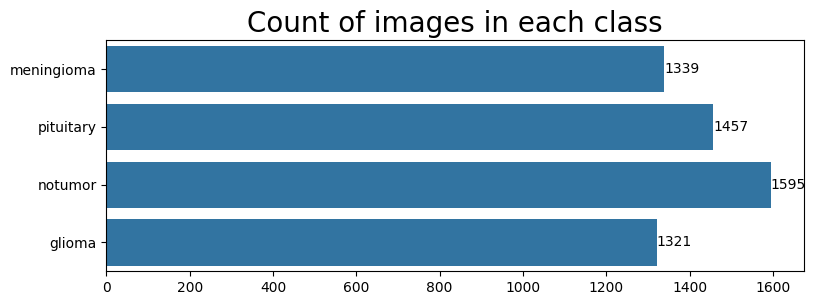

In [ ]:
plt.figure(figsize=(9,3))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Visualizing the number of test samples

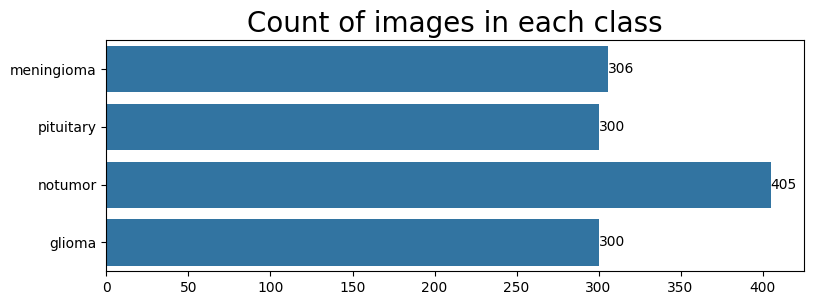

In [ ]:
plt.figure(figsize=(9,3))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Splitting data into train and test sets

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

,Class Path,Class
1297,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
18,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
367,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,pituitary
73,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
1120,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
...,...,...
1070,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
860,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,notumor
1284,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
194,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma


# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

batch_size = 32
img_size = (299, 299)
seed = 42

# Augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

# No augmentation for validation and test
test_val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train generator
tr_gen = train_datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed
)

# Validation generator
valid_gen = test_val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Test generator
ts_gen = test_val_datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

print("Class indices:", tr_gen.class_indices)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Getting samples from data

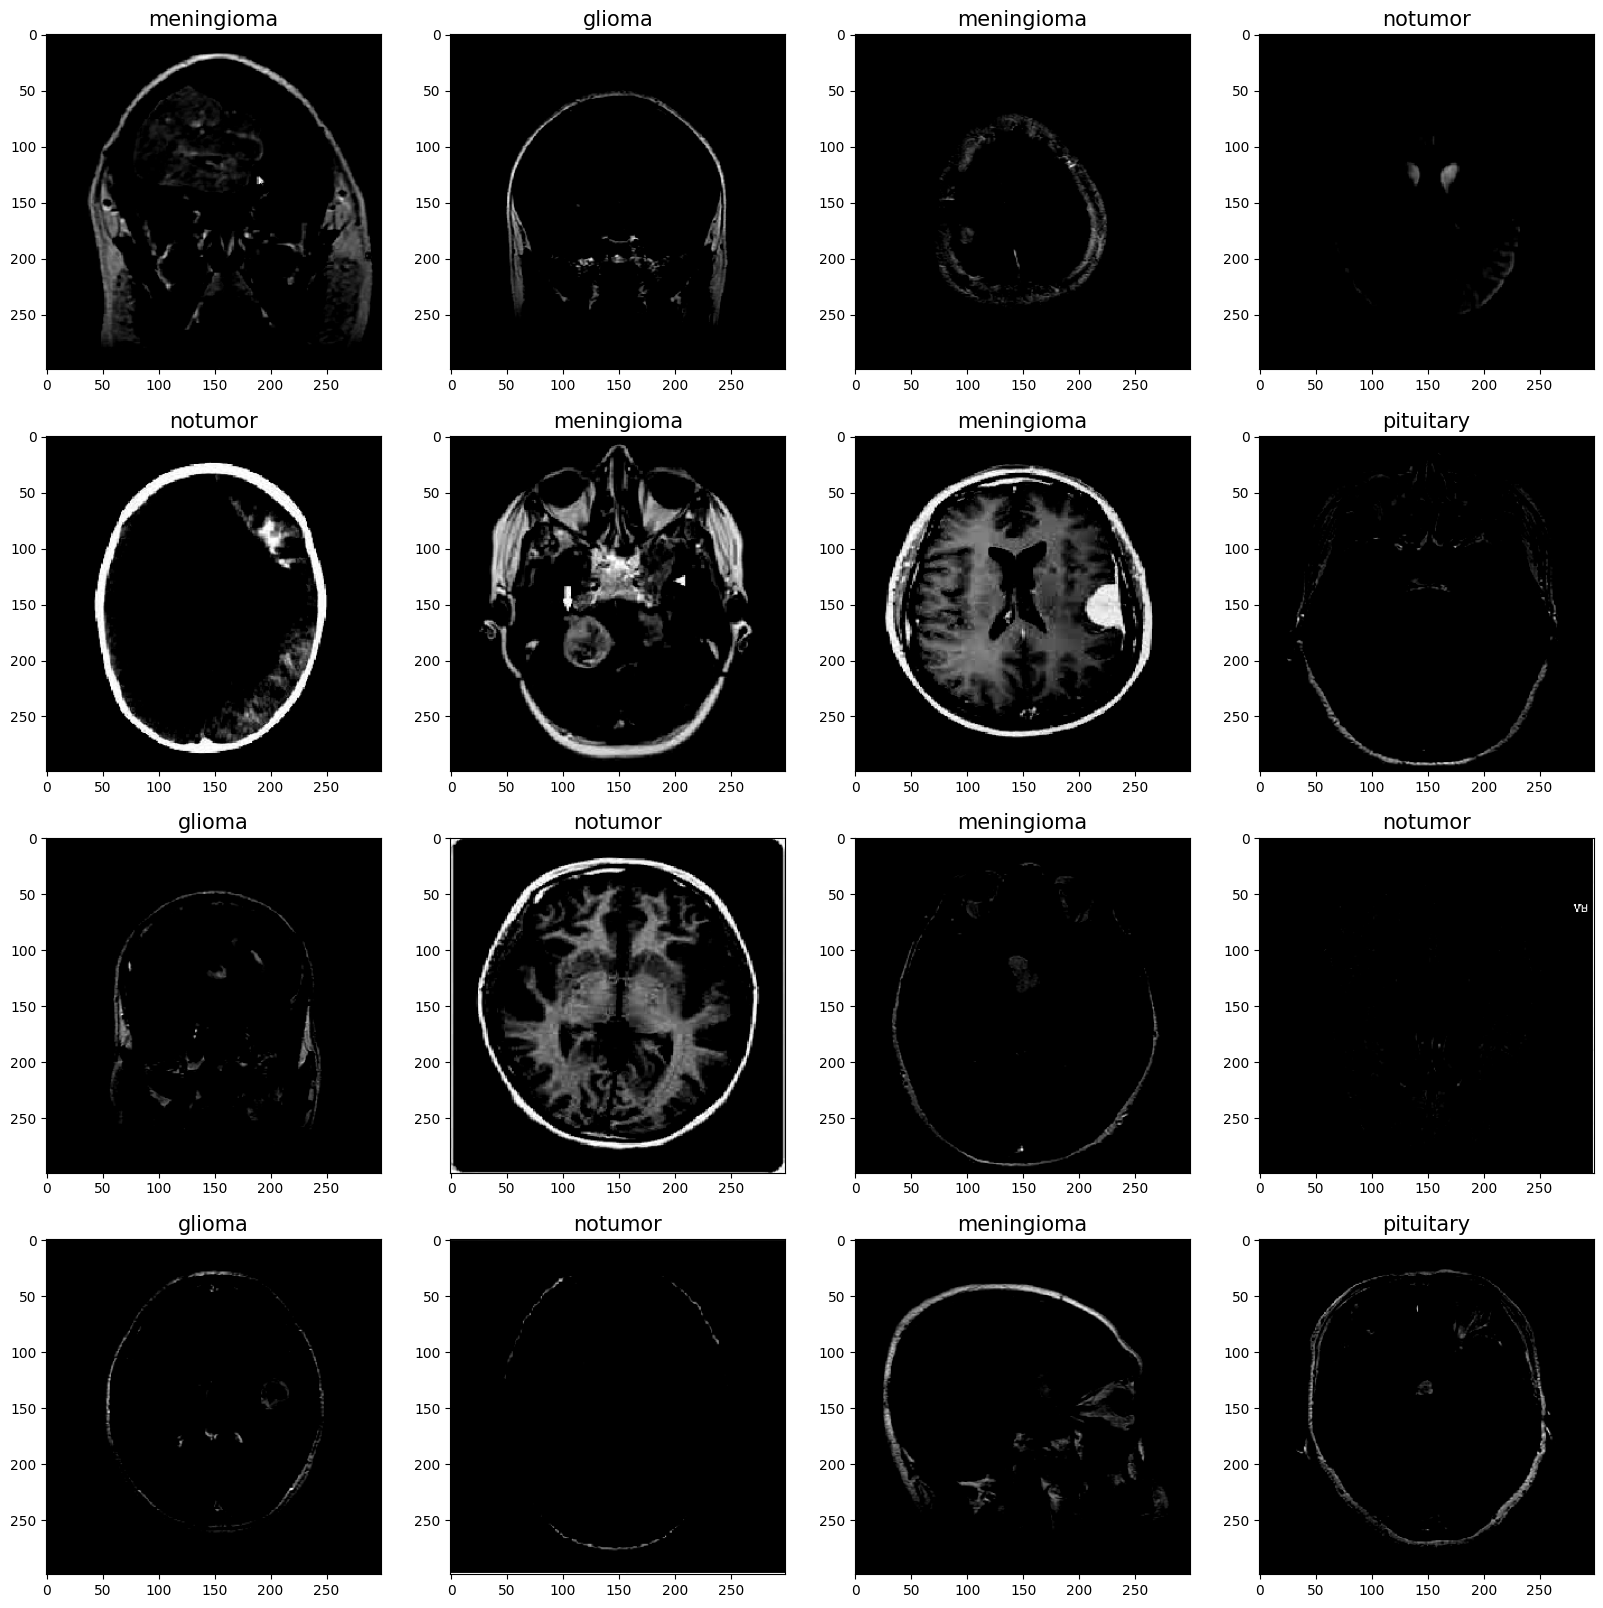

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

# Building the model

In [ ]:
import certifi
os.environ['SSL_CERT_FILE'] = certifi.where()
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

model.summary()

I0000 00:00:1744625801.368899   90956 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13890 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


# Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import logging

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(tr_gen,
                 epochs=1000,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[early_stopping, checkpoint])

logging.getLogger().setLevel(logging.ERROR)

Epoch 1/1000


I0000 00:00:1744625809.475275   91110 service.cc:152] XLA service 0x708a340025a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744625809.475289   91110 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-04-14 16:16:49.685622: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744625810.870860   91110 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-14 16:16:54.017329: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-14 16:16:54.106135: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, p

  1/179 ━━━━━━━━━━━━━━━━━━━━ 1:03:28 21s/step - accuracy: 0.3750 - loss: 3.9148 - precision: 0.4000 - recall: 0.3750

I0000 00:00:1744625823.891219   91110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.6884 - loss: 0.9438 - precision: 0.7484 - recall: 0.5753

2025-04-14 16:17:45.063549: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-14 16:17:45.146279: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-14 16:17:45.229784: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-14 16:17:45.783681: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more me

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.6891 - loss: 0.9415 - precision: 0.7490 - recall: 0.5764

2025-04-14 16:17:53.916759: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1083', 4 bytes spill stores, 4 bytes spill loads

2025-04-14 16:17:55.589755: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1083', 12 bytes spill stores, 12 bytes spill loads

2025-04-14 16:17:56.852917: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-14 16:17:56.935806: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-14 16:17:57.017975: E external/local_xla/xla

179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 308ms/step - accuracy: 0.6899 - loss: 0.9391 - precision: 0.7497 - recall: 0.5775 - val_accuracy: 0.7450 - val_loss: 0.6869 - val_precision: 0.7653 - val_recall: 0.7267
Epoch 2/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.9462 - loss: 0.1582 - precision: 0.9523 - recall: 0.9431 - val_accuracy: 0.9389 - val_loss: 0.1846 - val_precision: 0.9402 - val_recall: 0.9359
Epoch 3/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 219ms/step - accuracy: 0.9715 - loss: 0.0830 - precision: 0.9741 - recall: 0.9690 - val_accuracy: 0.9756 - val_loss: 0.0900 - val_precision: 0.9770 - val_recall: 0.9740
Epoch 4/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - accuracy: 0.9819 - loss: 0.0497 - precision: 0.9845 - recall: 0.9809 - val_accuracy: 0.9817 - val_loss: 0.0681 - val_precision: 0.9847 - val_recall: 0.9817
Epoch 5/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 214ms/step - accuracy: 0.9882 - loss: 0.0420 - precision: 0.9894 - recall: 0.9869 - val_accuracy: 0.9847 - 

# Visualizing model performance

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

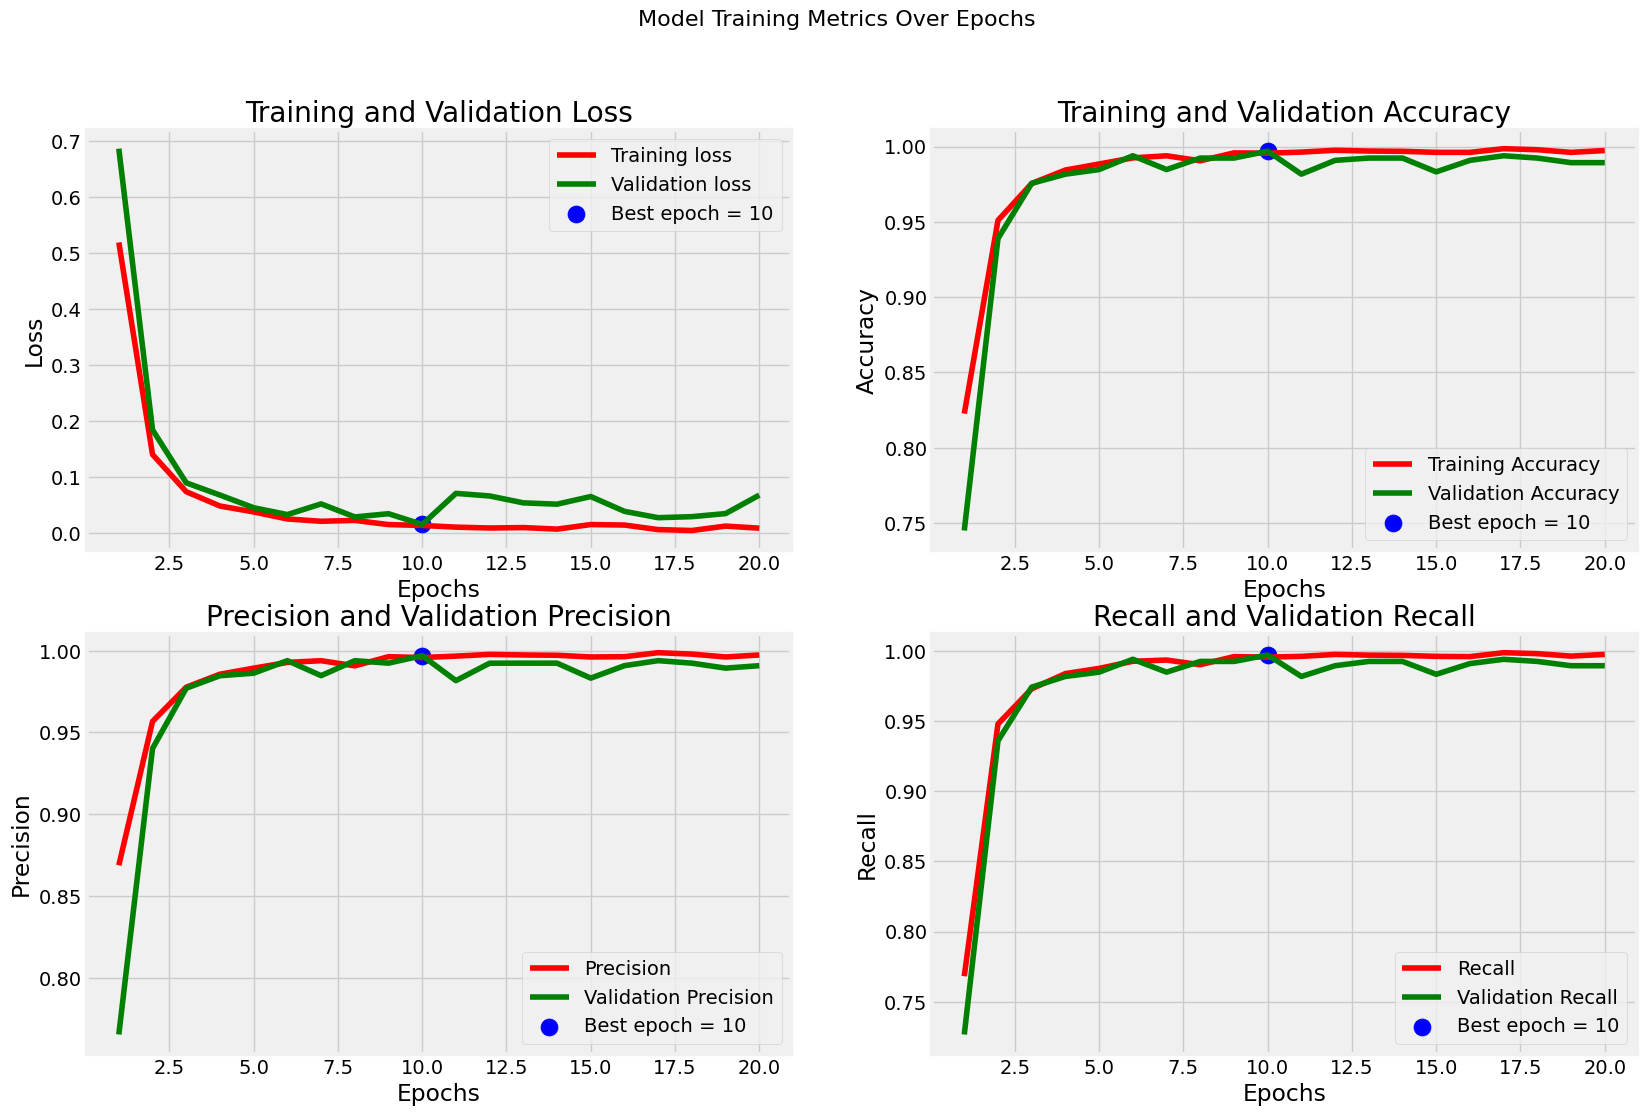

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

# Model evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

print(test_score)

178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.9988 - loss: 0.0038 - precision: 0.9988 - recall: 0.9988

2025-04-14 16:30:54.512493: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1083', 12 bytes spill stores, 12 bytes spill loads



179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 217ms/step - accuracy: 0.9988 - loss: 0.0038 - precision: 0.9988 - recall: 0.9988
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9990 - loss: 0.0064 - precision: 0.9990 - recall: 0.9990
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0018 - precision: 1.0000 - recall: 1.0000
Train Loss: 0.0027
Train Accuracy: 99.89%
--------------------
Validation Loss: 0.0156
Validation Accuracy: 99.69%
--------------------
Test Loss: 0.0026
Test Accuracy: 100.00%
[0.002562369452789426, 1.0, 1.0, 1.0]


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


# Confusion matrix

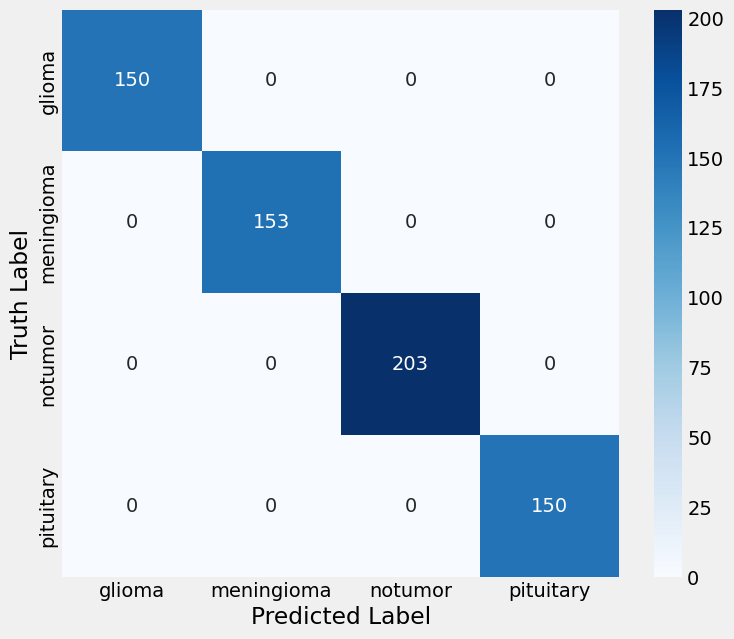

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

# Classification report

In [ ]:
report = classification_report(ts_gen.classes, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       150

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



# Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


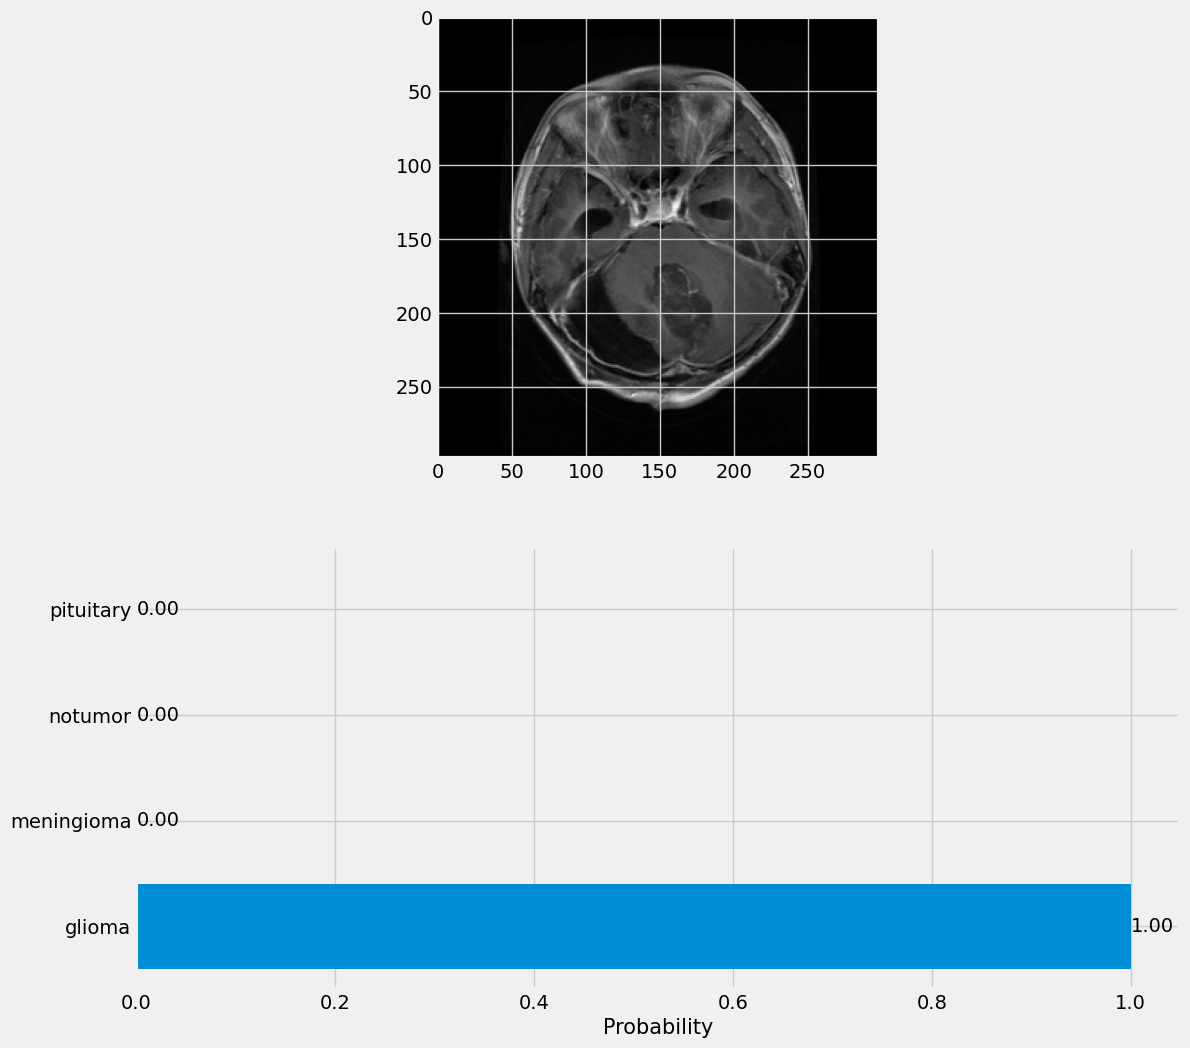

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/glioma/Te-glTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


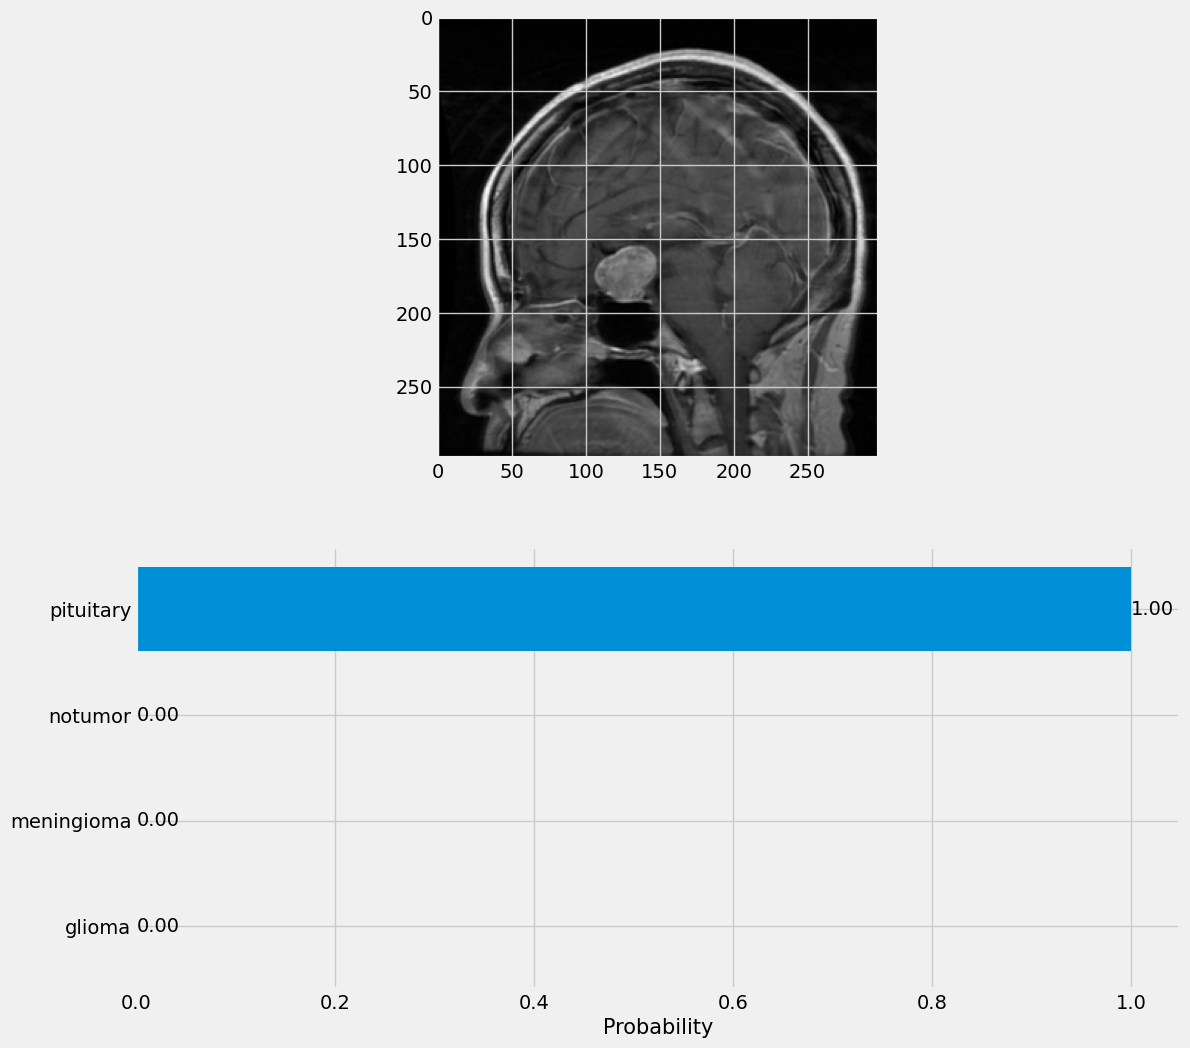

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/pituitary/Te-piTr_0008.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


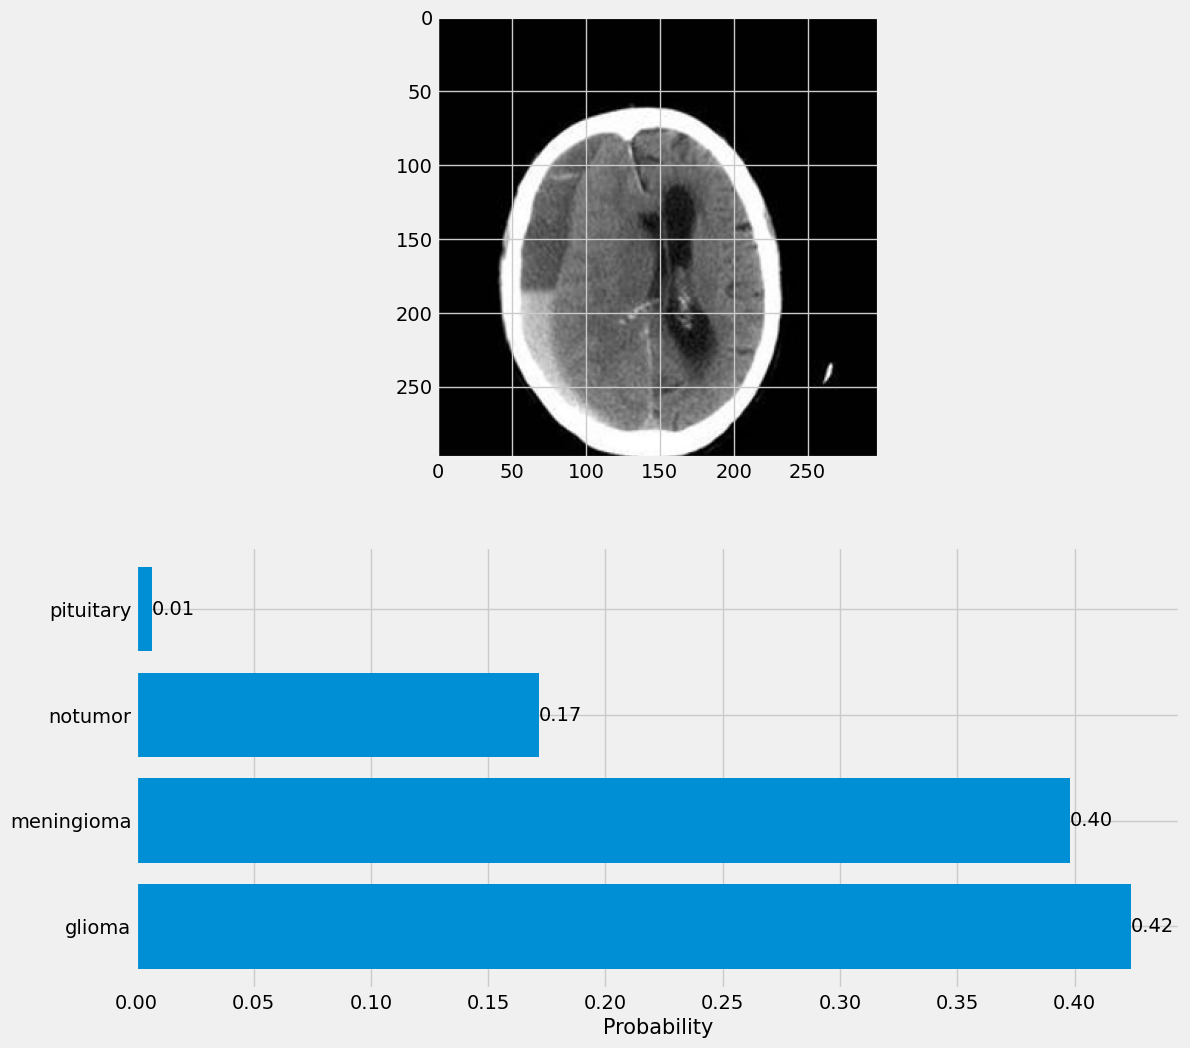

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/notumor/Te-noTr_0000.jpg')